## Lab 2.9: Data Merging, Case 2
### 1. Merge the two datasets

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

customers = pd.read_csv('data/customers.csv')
purchases = pd.read_csv('data/purchases.csv')

# inner join because I don't want customer information that hasn't made purchases
inner_join = pd.merge(customers, purchases, on='CustomerID', how='inner')
print("Inner Join:\n", inner_join)

Inner Join:
    CustomerID         Name  Age Gender PurchaseID PurchaseDate  Amount  \
0         101     John Doe   32      M      P1001   2024-07-11   250.0   
1         101     John Doe   32      M      P1004   2024-07-20    50.0   
2         102   Jane Smith   28      F      P1002   2024-06-15    75.5   
3         103    Peter Pan   45      M      P1003   2024-07-19   500.0   
4         104    Alice Lee   35      F      P1005   2024-06-30    35.0   
5         105    Bob White   52      M      P1007   2024-08-05   600.0   
6         106   Grace King   41      F      P1006   2024-08-01  1000.0   
7         107    Eve Black   26      F      P1008   2024-08-12   200.0   
8         108    Frank Red   38      M      P1009   2024-08-18   300.0   
9         109  Hannah Gray   30      F      P1010   2024-07-10   120.0   

      Product  
0      Laptop  
1    Keyboard  
2  Headphones  
3          TV  
4       Mouse  
5  Smartphone  
6      Laptop  
7      Tablet  
8     Monitor  
9    Keyboar

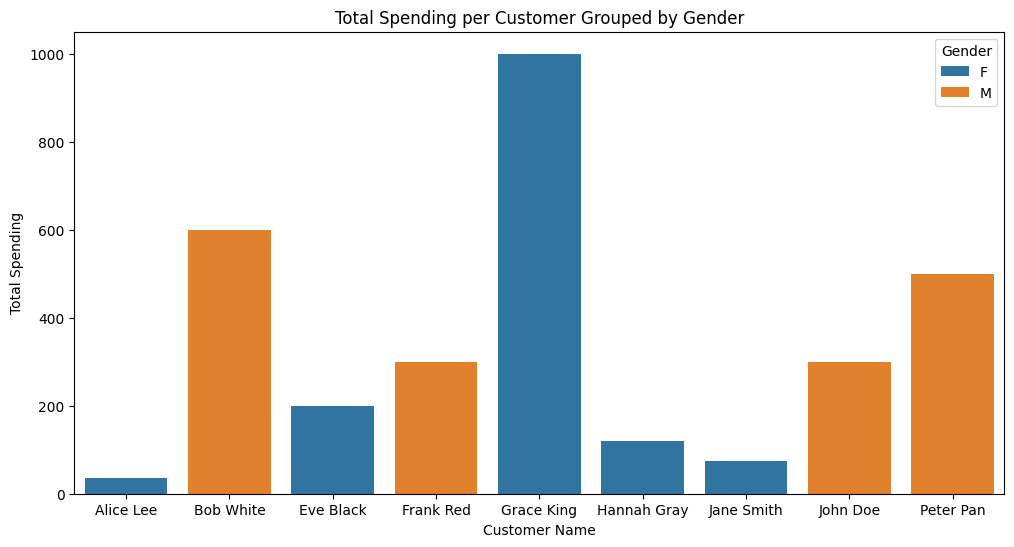

In [34]:
# new dataframe to prepare for barplot
customer_spending = inner_join.groupby(['Name', 'Gender'])['Amount'].sum().reset_index()

# barplot
plt.figure(figsize=(12,6))
sns.barplot(customer_spending, x='Name', y='Amount', hue='Gender')
plt.title("Total Spending per Customer Grouped by Gender")
plt.xlabel("Customer Name")
plt.ylabel("Total Spending")
plt.show()

### 2. Derived Variables

/tmp/ipykernel_85822/2106359924.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spend_by_age_group = inner_join.groupby('Age Group')['Average Spend'].median().reset_index()


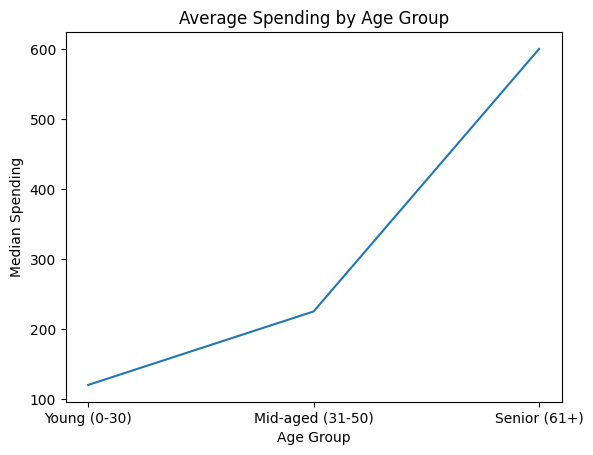

In [70]:
# grouping by age
bins = [0, 30, 50, 100]
labels = ['Young (0-30)', 'Mid-aged (31-50)', 'Senior (61+)']
inner_join['Age Group'] = pd.cut(inner_join['Age'], bins=bins, labels=labels)

# derived variable counting how many purchases each customer made, adding to each row checking the customer ID for that row
inner_join['Total Purchases'] = inner_join.groupby('CustomerID')['CustomerID'].transform('count')

# derived variable with median on spending per customerID
inner_join['Average Spend'] = inner_join.groupby('CustomerID')['Amount'].transform('median')

# new DataFrame for lineplot
average_spend_by_age_group = inner_join.groupby('Age Group')['Average Spend'].median().reset_index()

# lineplot
sns.lineplot(average_spend_by_age_group, x='Age Group', y='Average Spend')
plt.title("Average Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Spending")
plt.show()

### 3. Demographic Trends

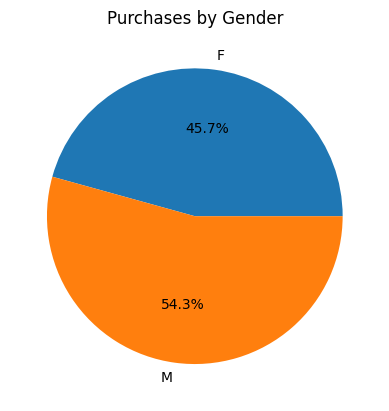

/tmp/ipykernel_85822/4261091117.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spend_by_age_group = inner_join.groupby('Age Group')['Amount'].sum().reset_index()


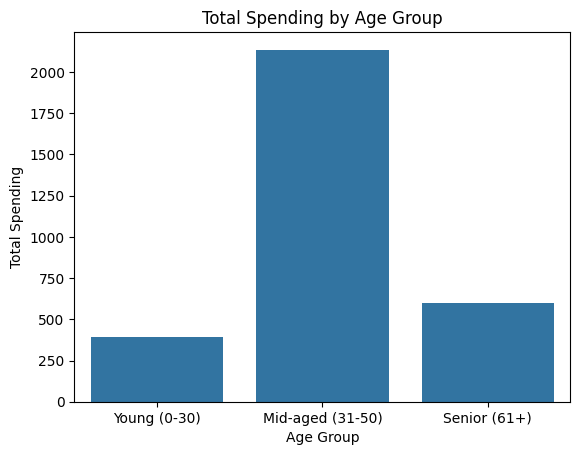

In [80]:
# purchases by gender
gender_purchases = inner_join.groupby('Gender')['Amount'].sum()

# pie chart
plt.pie(gender_purchases, labels=gender_purchases.index, autopct='%1.1f%%')
plt.title("Purchases by Gender")
plt.show()

# total spending by age group
total_spend_by_age_group = inner_join.groupby('Age Group')['Amount'].sum().reset_index()

# barplot
sns.barplot(total_spend_by_age_group, x='Age Group', y='Amount')
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Spending')
plt.show()
